In [3]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_handling
import functions
import pandas as pd
import scipy.signal as signal
import pywt
#import fcwt

In [4]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(1)
sampling_rate = 250

data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

samples_without_stimulus = int(0.5 * sampling_rate)

t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

num_electrodes = len(eeg_data)

FileNotFoundError: [Errno 2] No such file or directory: '../Dataset BETA/S1-S10/S1.mat'

In [4]:
low_freq = 5
high_freq = 20
sampling_rate = 250

b, a = signal.butter(4, [low_freq, high_freq], fs=sampling_rate, btype='band')

filtered_data = signal.lfilter(b, a, eeg_data_stimulus_only[occipital_electrodes_indexes[8], :, 2, 7])

Text(0.5, 1.0, 'Synthetic SSVEP response')

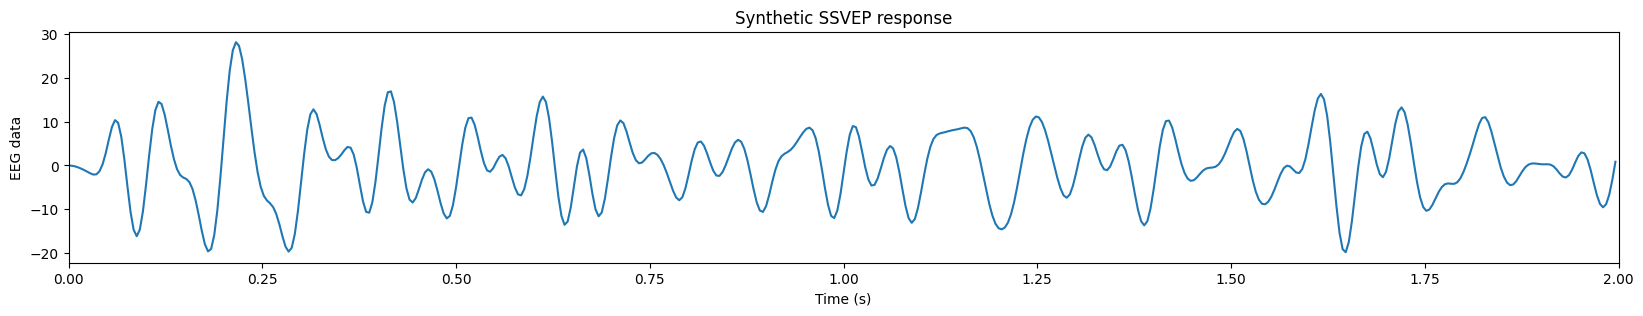

In [42]:
plt.figure(figsize=(20, 3))
plt.plot(t_stimulus_only, filtered_data)
plt.xlim(0, 2)
plt.xlabel("Time (s)")
plt.ylabel("EEG data")
plt.title("Synthetic SSVEP response")

# SYNTHETIC DATA

/var/folders/v_/yyjjwqx93jj6f359gjx0mwsh0000gn/T/ipykernel_2645/1948203660.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


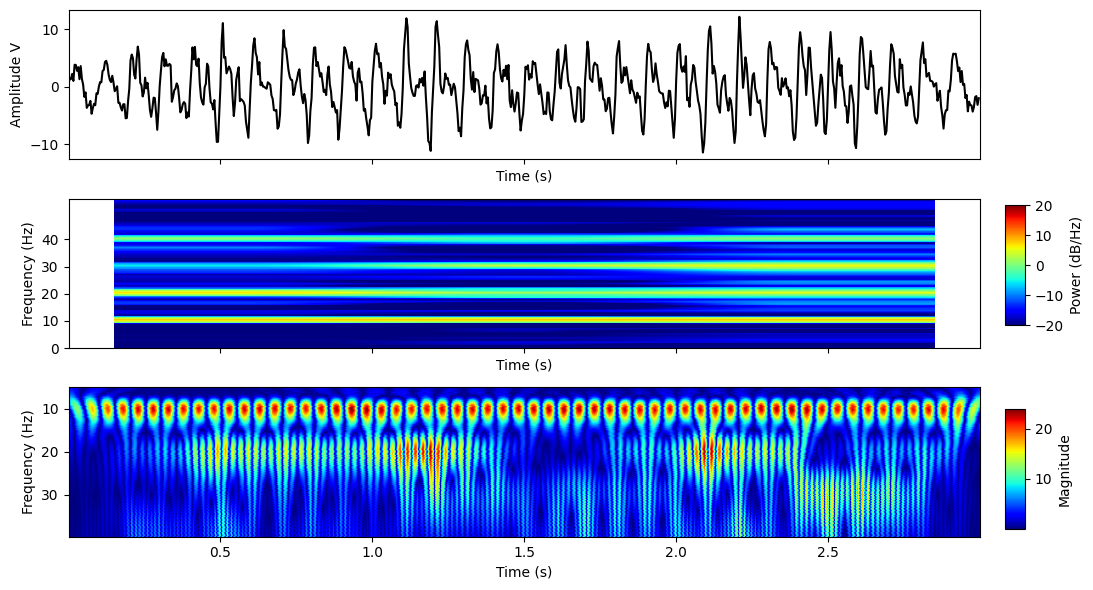

Maximum peak corresponding to frequency  10.0 Hz


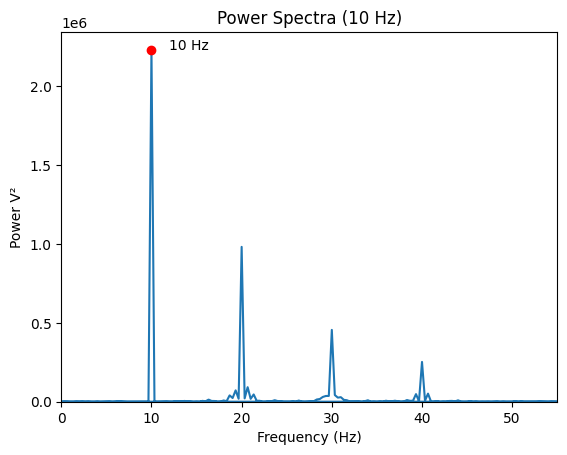

In [45]:

sampling_rate = 250
t = np.arange(0, 750/sampling_rate, 1/sampling_rate)

fundamental_frequency = 10
amplitude = 4
n_harmonics = 3

# Generate the base oscillatory signal
oscillatory_signal = amplitude*np.sin(np.pi * 2 * fundamental_frequency * t)

# Generate the frequencies for the harmonics
harmonic_frequencies = [fundamental_frequency * i for i in range(2, 2 + n_harmonics)] 

# Generate signals for the harmonic frequencies
harmonic_signals = [np.sin(np.pi * 2 * f * t) for f in harmonic_frequencies]

for h in range(len(harmonic_signals)):
    harmonic_signals[h] = harmonic_signals[h]*(amplitude/(h+2))

# Combine the original signal with harmonics
#combined_signal = oscillatory_signal + sum(harmonic_signals)

combined_signal = oscillatory_signal

import random 

for h in harmonic_signals:
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
    ini = random.randint(0, len(combined_signal) - 100)
    combined_signal[ini:ini+100] += h[ini:ini+100]
   

wavelet_name = "morl"

# Add noise
noise_amplitude = 1
noise = noise_amplitude * np.random.randn(len(combined_signal))
noisy_signal = combined_signal + noise

frequencies = np.arange(5, 40, 0.2)  # Frequencies to analyze
scales = pywt.frequency2scale(wavelet_name, frequencies/sampling_rate)
cwtmatr, freqs = pywt.cwt(noisy_signal, scales, wavelet_name)


# Rest of your code...

# Create the subplots
fig, (ax1, ax2, ax4) = plt.subplots(nrows=3, figsize=(10, 6), sharex=True)

# Plot on ax1
ax1.plot(t, noisy_signal, 'k')
ax1.set_xlim(0, 4)
ax1.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax1.set_ylabel("Amplitude V")
ax1.set_xlabel("Time (s)")
ax1.set_xlim(0, 3)

# Plot on ax2
vmin = -20
vmax = 20
f_value = 10
window_length = 300
Pxx, freqs, bins, im = ax2.specgram(noisy_signal, NFFT=window_length, Fs=sampling_rate, noverlap=int(window_length/4), cmap='jet', vmin=vmin, vmax=vmax)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 55)
ax2.set_yticks([0, f_value, f_value * 2, f_value * 3, f_value * 4])
# Add colorbar for the spectrogram
cbar_ax2 = fig.add_axes([1.01, 0.45, 0.02, 0.2])  # [left, bottom, width, height]
plt.colorbar(im, cax=cbar_ax2, label='Power (dB/Hz)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')


# Plot on ax3

# Plot on ax4
ax4.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(noisy_signal) / sampling_rate, frequencies[-1], frequencies[0]], origin='upper')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_xlim(0, 3)
#ax4.axvline(1, color='red')
#ax4.axvline(2, color='red')
#ax4.axhline(2*fundamental_frequency, color="red")
#indexes = np.linspace(1, 2, num=20)
#indexes[7] = indexes[7] - 0.01
#indexes[8] = indexes[8] - 0.02
#indexes[9] = indexes[9] - 0.04
#indexes[10] = indexes[10] - 0.04
#for i in range(11, 20):
#    indexes[i] = indexes[i] - 0.05
#for i in range(20):
#    if i%2 == 0:
#        ax4.text(indexes[i], 29, str(i+1), color="red")
#    else:
#        ax4.text(indexes[i], 15, str(i+1), color="red")
# Add colorbar for the CWT coefficients
cbar_ax4 = fig.add_axes([1.01, 0.11, 0.02, 0.2])
plt.colorbar(ax4.images[0], cax=cbar_ax4, label="Magnitude")

plt.tight_layout()

plt.show()

fft_result = np.fft.fft(noisy_signal)
freq = np.fft.fftfreq(len(noisy_signal), d=1/sampling_rate)
power_spectra = np.abs(fft_result) ** 2

print("Maximum peak corresponding to frequency ", freq[np.argmax(power_spectra[0:500])], "Hz")

plt.plot(freq, power_spectra)
plt.xlim(0, 400)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power V²")
plt.title("Power Spectra (10 Hz)")
plt.plot(freq[np.argmax(power_spectra[0:500])], max(power_spectra[0:500]), marker="o", color="red")
plt.text(freq[np.argmax(power_spectra[0:500])] + 2, max(power_spectra[0:500]), "10 Hz")
plt.xlim(0, 55)
plt.ylim(0)

plt.show()

# 3 SPECTROGRAMS

In [33]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(23)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

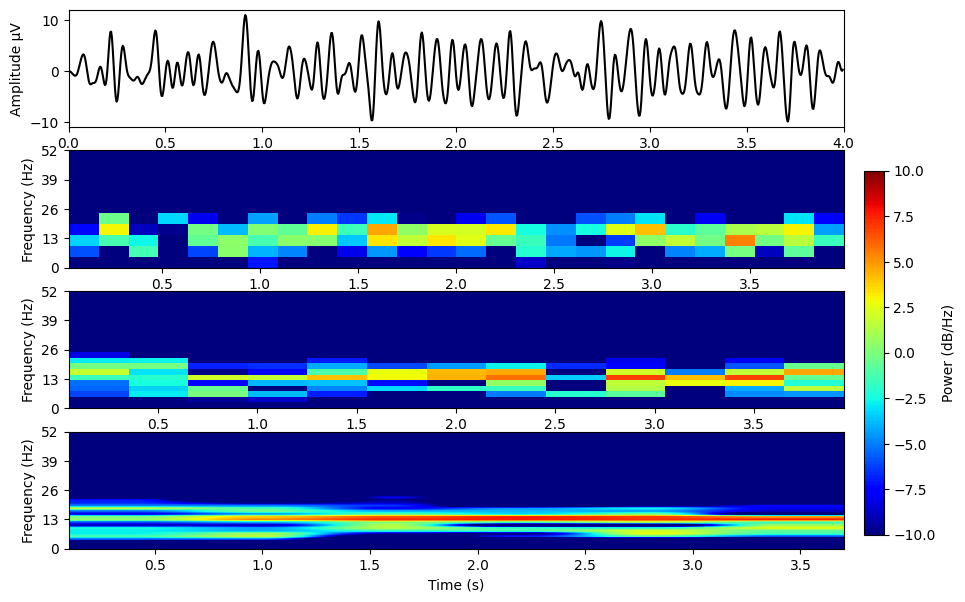

In [79]:
f_idx = 22
f_value = data_frequencies[f_idx]

# Define the parameters for the spectrogram
fs = sampling_rate  # Sampling frequency
data = eeg_data[61, :, 0, f_idx]
filtered_data = signal.lfilter(b, a, data)
#filtered_data = data

# Compute and plot the spectrogram
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 7))

# Plot the first plot (ax1) with the same time range as the spectrograms
ax1.plot(t, filtered_data, 'k')
ax1.set_xlim(0, 4)  # Set the same time range as the spectrograms
ax1.set_ylabel("Amplitude " + '\u03BC' + "V")
ax1.set_xlabel("Time (s)")

frequency_range = (0, 50)

# Set vmin and vmax for the spectrograms to cover the entire range of the data
vmin = -10
vmax = 10

window_lengths = [50, 100, 200]  # Length of the window for computing the spectrogram
overlap = [int(x / 4) for x in window_lengths]  # Overlap between consecutive windows

# Plot spectrograms with limited frequency range
Pxx, freqs, bins, im = ax2.specgram(filtered_data, NFFT=window_lengths[0], Fs=fs, noverlap=overlap[0], cmap='jet', vmin=vmin, vmax=vmax)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_ylim(frequency_range)
ax2.set_yticks([0, f_value, f_value * 2, f_value * 3, f_value * 4])

Pxx, freqs, bins, im = ax3.specgram(filtered_data, NFFT=window_lengths[1], Fs=fs, noverlap=overlap[1], cmap='jet', vmin=vmin, vmax=vmax)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_ylim(frequency_range)
ax3.set_yticks([0, f_value, f_value * 2, f_value * 3, f_value * 4])

Pxx, freqs, bins, im = ax4.specgram(filtered_data, NFFT=window_lengths[2], Fs=fs, noverlap=overlap[2], cmap='jet', vmin=vmin, vmax=vmax)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_ylim(frequency_range)
ax4.set_yticks([0, f_value, f_value * 2, f_value * 3, f_value * 4])
#ax4.axhline(13, color="black", linewidth=2)

# Create colorbars next to the first plot
cbar_ax = fig.add_axes([0.92, 0.13, 0.02, 0.52])
cbar = plt.colorbar(im, cax=cbar_ax, label='Power (dB/Hz)')

plt.show()



Maximum peak corresponding to frequency  13.0 Hz


(0.0, 3724729.531872447)

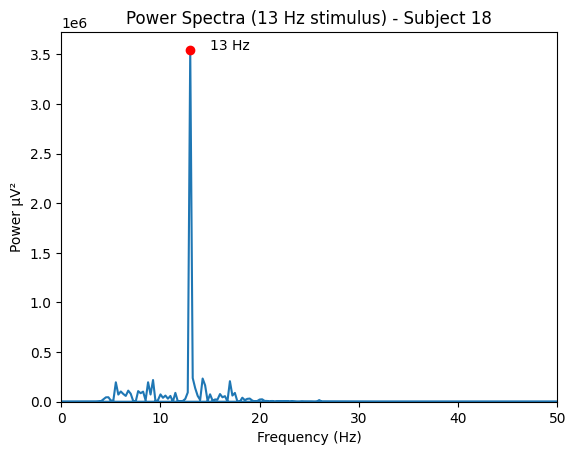

In [80]:
fft_result = np.fft.fft(filtered_data)
freq = np.fft.fftfreq(len(filtered_data), d=1/sampling_rate)
power_spectra = np.abs(fft_result) ** 2

print("Maximum peak corresponding to frequency ", freq[np.argmax(power_spectra[0:500])], "Hz")

plt.plot(freq, power_spectra)
plt.xlim(0, 400)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power " + '\u03BC' + 'V²')
plt.title("Power Spectra (13 Hz stimulus) - Subject 18")
plt.plot(freq[np.argmax(power_spectra[0:500])], max(power_spectra[0:500]), marker="o", color="red")
plt.text(freq[np.argmax(power_spectra[0:500])] + 2, max(power_spectra[0:500]), "13 Hz")
plt.xlim(0, 50)
plt.ylim(0)

In [81]:
print("Maximum peak corresponding to frequency ", freq[35+np.argmax(power_spectra[35:43])], "Hz at ", 35+np.argmax(power_spectra[35:43]))

Maximum peak corresponding to frequency  9.25 Hz at  37


(0.0, 3724729.531872447)

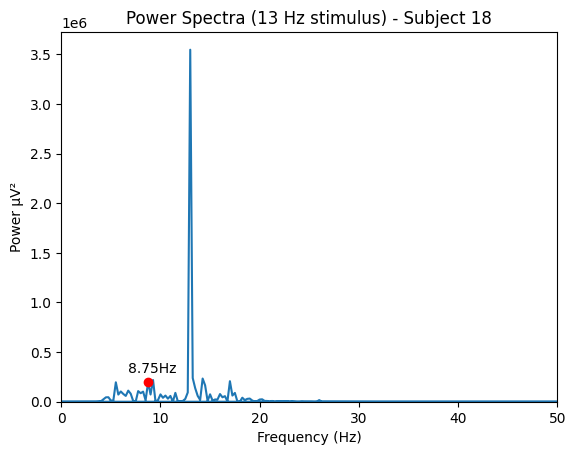

In [87]:
plt.plot(freq, power_spectra)
plt.xlim(0, 400)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power " + '\u03BC' + 'V²')
plt.title("Power Spectra (13 Hz stimulus) - Subject 18")
plt.plot(freq[np.argmax(power_spectra[0:36])], max(power_spectra[0:36]), marker="o", color="red")
plt.text(freq[np.argmax(power_spectra[0:36])] - 2, max(power_spectra[0:36]) + 100000, str(freq[np.argmax(power_spectra[0:36])]) + "Hz")
plt.xlim(0, 50)
plt.ylim(0)

# Wavelet Transfrom FREQUENCY

The y-axis in your wavelet transform plot does represent frequency in Hz. However, there's a common misconception when interpreting continuous wavelet transform (CWT) results that might explain why you see the highest coefficients around y = 20 when the fundamental frequency of your signal is 10 Hz.

In a CWT, the y-axis represents the scale parameter, not the actual frequency. The scale parameter is related to frequency, but it's not a one-to-one mapping. Specifically, the relationship between the scale parameter (y-axis) and frequency (in Hz) depends on the choice of wavelet and its properties.

The Morlet wavelet, which you're using with the 'morl' wavelet name, is a complex wavelet that oscillates at different frequencies depending on the scale. In the context of the Morlet wavelet, higher scale values correspond to lower frequencies. This is why you see the highest coefficients around y = 20 when the fundamental frequency of your signal is 10 Hz. At larger scale values (lower frequencies), the wavelet oscillates more slowly and can capture lower-frequency components in your signal, including harmonics.

To interpret the wavelet coefficients correctly, you should keep in mind that the y-axis represents scale, not a direct frequency. The exact relationship between scale and frequency depends on the specific wavelet used and its parameters. In the case of the Morlet wavelet, higher scale values correspond to lower frequencies.

C:\Users\Tania\AppData\Local\Temp\ipykernel_2372\2371686864.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


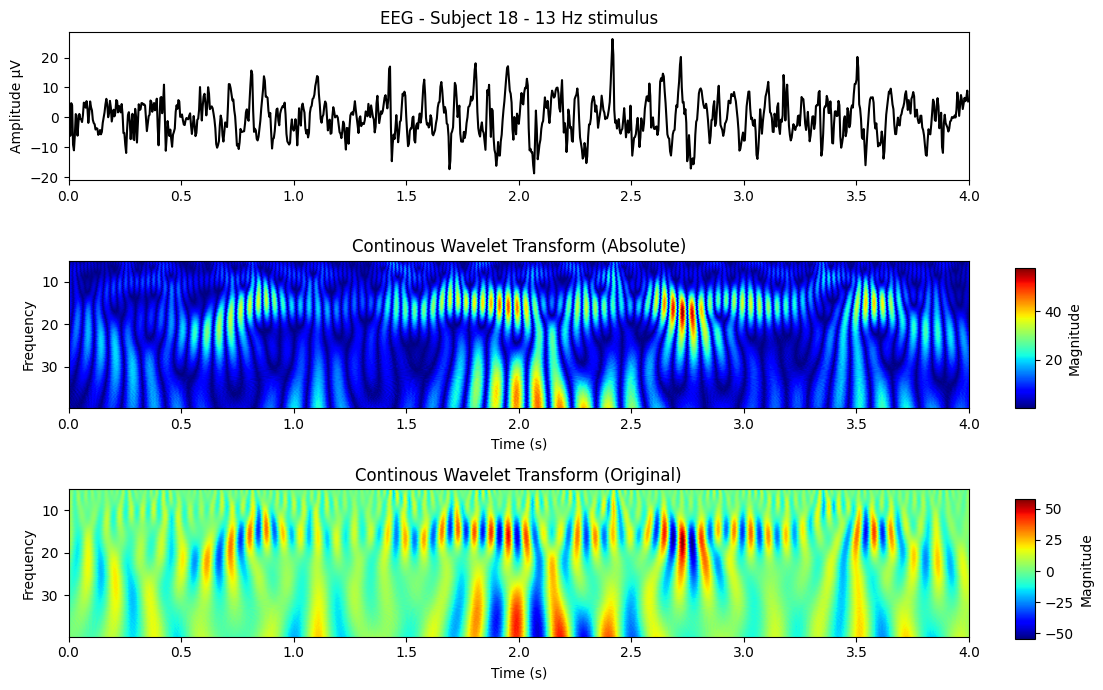

In [214]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(18)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

f_idx = 22
f_value = data_frequencies[f_idx]

# Define the parameters for the spectrogram
fs = sampling_rate  # Sampling frequency
data = eeg_data[61, :, 0, f_idx]
filtered_data = signal.lfilter(b, a, data)
#filtered_data = data

frequencies = np.arange(5, 40, 0.2)  # Frequencies to analyze
cwtmatr, freqs = pywt.cwt(filtered_data, frequencies, "morl")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 7))

ax1.plot(t,filtered_data, 'k')
ax1.set_xlim(0, 4)
ax1.set_ylabel("Amplitude " + '\u03BC' + "V")
ax1.set_title("EEG - Subject 18 - 13 Hz stimulus")

ax2.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(noisy_signal) / sampling_rate, frequencies[-1], frequencies[0]], origin='upper')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency')
ax2.set_title("Continous Wavelet Transform (Absolute)")
cbar_ax2 = fig.add_axes([1.02, 0.41 , 0.02, 0.2])
plt.colorbar(ax2.images[0], cax=cbar_ax2, label="Magnitude")

ax3.imshow(cwtmatr, aspect='auto', cmap='jet', extent=[0, len(noisy_signal) / sampling_rate, frequencies[-1], frequencies[0]], origin='upper')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Frequency')
ax3.set_title("Continous Wavelet Transform (Original)")
cbr_ax3 = fig.add_axes([1.02, 0.08, 0.02, 0.2])
plt.colorbar(ax3.images[0], cax=cbr_ax3, label="Magnitude")

plt.tight_layout()

# Wavelet Transform SPACE

Yes, you can combine the wavelet transforms of multiple signals to analyze spatial information or identify regions where a certain threshold is exceeded. This can be particularly useful in applications such as EEG or image processing, where you want to analyze patterns across multiple channels or pixels.

Here's a general approach to achieve this:

1. Wavelet Transform of Multiple Signals: Apply the wavelet transform (CWT or Discrete Wavelet Transform - DWT) to each of your signals or channels separately to obtain the wavelet coefficients for each signal.

2. Spatial Analysis: To analyze spatial information or identify regions where a threshold is exceeded, you can consider various techniques depending on your specific application:

    - Spatial Summation: Sum the coefficients across all signals at each scale and frequency to obtain a spatial representation of the combined energy or magnitude at different scales and frequencies.
    - Thresholding: Apply a threshold to the combined spatial representation to identify regions where the combined energy exceeds a certain threshold.
    - Spatial Filtering: Apply spatial filters or convolution operations to enhance certain spatial features or patterns.
    - Cluster Analysis: Use clustering techniques to group regions with similar spatial characteristics.
    - Visualization: Create spatial plots or heatmaps to visualize the results.

3. Thresholding and Visualization:After combining and analyzing the wavelet coefficients spatially, you can set a threshold to identify regions of interest. For example, if you want to identify regions where the combined energy exceeds a certain threshold, you can threshold the spatial representation accordingly.

4. Plotting: Create plots or visualizations that show the spatial information or regions that meet your criteria. This can include spatial maps, heatmaps, contour plots, or any other visualization that helps you understand the spatial distribution of wavelet features.

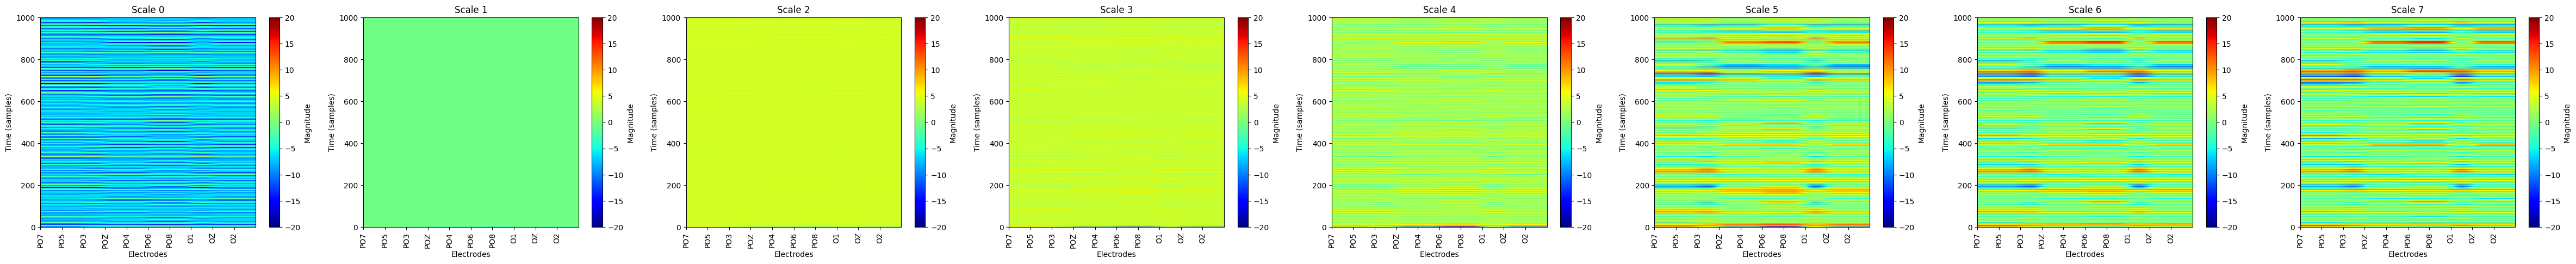

In [249]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(16)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

f_idx = 22
f_value = data_frequencies[f_idx]

num_scales = 8
num_signals = len(occipital_electrodes_indexes)
num_samples = len(eeg_data[0])

wavelet_coeffs = np.zeros((num_signals, num_scales, num_samples))

for electrode_idx, electrode in enumerate(occipital_electrodes_indexes):

    data = eeg_data[electrode, :, 0, f_idx]
    filtered_data = signal.lfilter(b, a, data)
    
    coeffs, _ = pywt.cwt(filtered_data, np.arange(1, num_scales + 1), "morl")

    wavelet_coeffs[electrode_idx] = coeffs


fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(60, 5))

for scale_idx in range(8):

    ax = axs[scale_idx]

    selected_scale_coeffs = wavelet_coeffs[:, scale_idx, :]
    selected_scale_coeffs = selected_scale_coeffs.T

    # Create spatial images
    ax.imshow(
        selected_scale_coeffs,
        aspect='auto',
        cmap='jet',
        origin='upper',
        extent=[0, num_signals, 0, num_samples]
    )
    ax.set_xlabel("Electrodes")
    ax.set_ylabel("Time (samples)")
    ax.set_title(f"Scale {scale_idx}")

    cbar = plt.colorbar(im, ax=ax, label="Magnitude")

    # Set x-axis ticks and labels for num_signals
    ax.set_xticks(np.arange(num_signals))
    ax.set_xticklabels(occipital_electrodes_names, rotation=90)  # Use electrode names as labels


plt.show()

# PyWavelets vs fCWT

(200,)


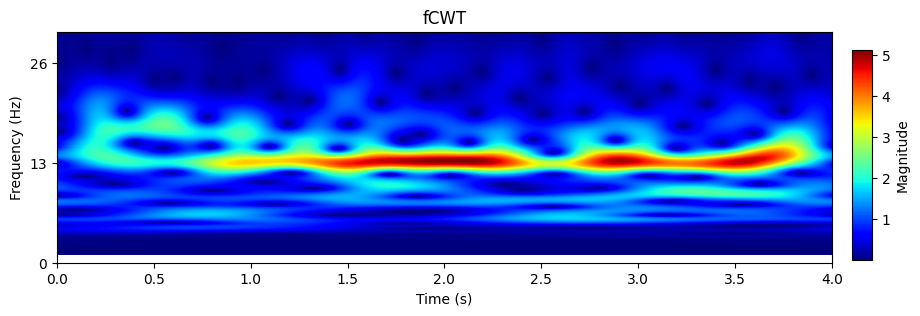

In [270]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(23)
sampling_rate = 250

data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

samples_without_stimulus = int(0.5 * sampling_rate)

t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

freqs, out = fcwt.cwt(signal.lfilter(b, a, eeg_data[61, :, 0, 22]), sampling_rate, 1, 30, 200)

print(freqs.shape)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

result = np.abs(out)# + np.angle(out)

# Display the data using imshow
im = ax.imshow(result, cmap='jet', extent=[t.min(), t.max(), freqs[-1], freqs[0]], origin='upper', aspect='auto')

frequencies = np.arange(0, 31, step=data_frequencies[22])
ax.set_yticks(frequencies)
ax.set_yticklabels([f"{int(freq)}" for freq in frequencies])
ax.set_ylabel("Frequency (Hz)")
ax.set_xlabel("Time (s)")
ax.set_xlim(0, 4)
ax.set_ylim(0, 30)
ax.set_title("fCWT")

cax = fig.add_axes([0.92, 0.12, 0.02, 0.7])  # Adjust these values as needed
cbar = fig.colorbar(im, cax=cax, aspect=20, label="Magnitude")  # Adjust the aspect parameter as needed


# Show the plot
plt.show()
    

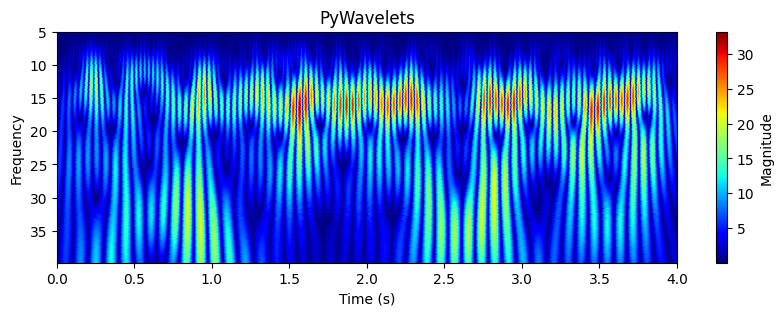

In [272]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(23)
sampling_rate = 250

data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

samples_without_stimulus = int(0.5 * sampling_rate)

t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)
filtered_data = signal.lfilter(b, a, eeg_data[61, :, 0, 22])

freqs, out = fcwt.cwt(filtered_data, sampling_rate, 1, 30, 200)

frequencies = np.arange(5, 40, 0.2)  # Frequencies to analyze
cwtmatr, freqs = pywt.cwt(filtered_data, frequencies, "morl")

plt.figure(figsize=(10, 3))
plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(noisy_signal) / sampling_rate, frequencies[-1], frequencies[0]], origin='upper')
plt.title("PyWavelets")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.colorbar(label="Magnitude")
plt.show()
plt.close()

# Data vs spectrogram vs wavelets SAVE

In [166]:
import os 

def save_subject_FFT(subject, type, filtered):
    
    eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(subject)
    sampling_rate = 250

    data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
    occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

    samples_without_stimulus = int(0.5 * sampling_rate)

    t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
    t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

    num_electrodes = len(eeg_data)

    fs = sampling_rate  # Sampling frequency
    window_length = 300  # Length of the window for computing the spectrogram
    overlap = int(window_length / 4)  # Overlap between consecutive windows

    data_names = ["OZ", "POZ", "OZ-POZ", "POZ-OZ"]

    used_frequencies = [2, 7, 12, 17, 22, 27, 32, 37]

    duration = len(eeg_data[0])/sampling_rate
    x_ticks = np.arange(0, duration, step=0.5)

    for f_idx in range(len(used_frequencies)):

        freq_idx = used_frequencies[f_idx]

        full_data = []

        if filtered == "Filtered":
            data = eeg_data[61, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[55, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[61, :, 0, freq_idx] - eeg_data[55, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[55, :, 0, freq_idx] - eeg_data[61, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)
        else:
            data = eeg_data[61, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[55, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[61, :, 0, freq_idx] - eeg_data[55, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[55, :, 0, freq_idx] - eeg_data[61, :, 0, freq_idx]
            full_data.append(data)

        for d_idx in range(4):

            data = full_data[d_idx]

            fft_result = np.fft.fft(data)
            freq = np.fft.fftfreq(len(data), d=1/sampling_rate)
            power_spectra = np.abs(fft_result) ** 2

            peak = str(freq[np.argmax(power_spectra[0:500])]) + " Hz"
            plt.plot(freq, power_spectra)
            plt.xlim(0, 400)
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Power V²")
            plt.title("Power Spectra ("+str(data_frequencies[freq_idx])+" Hz) - "+data_names[d_idx])
            plt.plot(freq[np.argmax(power_spectra[0:500])], max(power_spectra[0:500]), marker="o", color="red")
            plt.text(freq[np.argmax(power_spectra[0:500])] + 2, max(power_spectra[0:500]), peak)
            plt.xlim(0, 50)
            plt.ylim(0)

            # Specify the directory path where you want to save the images
            output_directory = "../Imágenes/Wavelets/"+type+"/"+filtered+"/S" + str(subject) + "/FFT/"

            # Create the directory if it doesn't exist
            os.makedirs(output_directory, exist_ok=True)

            # Construct the image filename
            img_filename = f"S{subject}_F{int(data_frequencies[freq_idx])}_{data_names[d_idx]}_FFT.png"
            img_pathname = os.path.join(output_directory, img_filename)

            # Save the image
            plt.savefig(img_pathname, bbox_inches='tight')  # Use bbox_inches='tight' to ensure everything fits

            plt.close()


In [21]:
import os

def save_subject(subject, type, filtered):

    eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(subject)
    sampling_rate = 250

    data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
    occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

    samples_without_stimulus = int(0.5 * sampling_rate)

    t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
    t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

    num_electrodes = len(eeg_data)

    fs = sampling_rate  # Sampling frequency
    window_length = 300  # Length of the window for computing the spectrogram
    overlap = int(window_length / 4)  # Overlap between consecutive windows

    data_names = ["OZ", "POZ", "OZ-POZ", "POZ-OZ"]

    used_frequencies = [2, 7, 12, 17, 22, 27, 32, 37]

    duration = len(eeg_data[0])/sampling_rate
    x_ticks = np.arange(0, duration, step=0.5)

    for f_idx in range(len(used_frequencies)):

        freq_idx = used_frequencies[f_idx]

        full_data = []

        if filtered == "Filtered":
            data = eeg_data[61, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[55, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[61, :, 0, freq_idx] - eeg_data[55, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)

            data = eeg_data[55, :, 0, freq_idx] - eeg_data[61, :, 0, freq_idx]
            filtered_data = signal.lfilter(b, a, data)
            full_data.append(filtered_data)
        else:
            data = eeg_data[61, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[55, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[61, :, 0, freq_idx] - eeg_data[55, :, 0, freq_idx]
            full_data.append(data)

            data = eeg_data[55, :, 0, freq_idx] - eeg_data[61, :, 0, freq_idx]
            full_data.append(data)

        for d_idx in range(4):

            wavelet_name = 'morl'

            frequencies = np.arange(5, 40, 0.2)  # Frequencies to analyze
            cwtmatr, freqs = pywt.cwt(full_data[d_idx], frequencies, wavelet_name)

            fig, (ax1, ax2, ax4) = plt.subplots(nrows=3, figsize=(10, 6))
            ax1.plot(t, full_data[d_idx], 'k')
            ax1.set_xlim(0, duration)
            ax1.set_xticks(x_ticks)
            ax1.set_ylabel("Amplitude " + '\u03BC' + "V")
            ax1.set_xlabel("Time (s)")

            vmin = -10
            vmax = 10
            
            Pxx, freqs, bins, im = ax2.specgram(full_data[d_idx], NFFT=window_length, Fs=fs, noverlap=overlap, cmap='jet', vmin=vmin, vmax=vmax)
            f_value = data_frequencies[freq_idx]
            ticks = np.arange(0, 50, step=f_value)
            ax2.set_yticks(ticks)
            #ax2.set_xticks(x_ticks)
            ax2.set_xlabel('Time (s)')
            ax2.set_ylabel('Frequency (Hz)')
            ax2.set_ylim(0, 50)
            cbar_ax2 = fig.add_axes([0.92, 0.38, 0.02, 0.2])  # [left, bottom, width, height]
            cbar2 = plt.colorbar(im, cax=cbar_ax2)
            cbar2.set_label('Power (dB/Hz)', labelpad=10)  # Adjust label position with labelpad

            ax4.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(eeg_data[0])/sampling_rate, frequencies[-1], frequencies[0]], origin='upper', vmin = 0, vmax=40)
            ax4.set_xlabel('Time (s)')
            ax4.set_ylabel('Frequency')
            cbar_ax4 = fig.add_axes([0.92, 0.12, 0.02, 0.2])
            cbar4 = plt.colorbar(ax4.images[0], cax=cbar_ax4)
            cbar4.set_label('Magnitude', labelpad=10)

            #freqs, out = fcwt.cwt(full_data[d_idx], sampling_rate, 1, 50, 200)
            #im = ax4.imshow(np.abs(out), cmap='jet', extent=[0, out.shape[1], freqs[-1], freqs[0]], origin='upper', aspect='auto')
            #frequencies = np.arange(0, 31, step=data_frequencies[7])
            #ax4.set_yticks(ticks)
            #ax4.set_yticklabels([f"{freq}" for freq in ticks])
            #ax4.set_ylabel("Frequency (Hz)")
            #ax4.set_xlabel('Time (s)')

            plt.suptitle(str(data_names[d_idx]), fontsize=20)
            plt.subplots_adjust(right=0.85)

            # Specify the directory path where you want to save the images
            output_directory = "../Imágenes/Wavelets/"+type+"/"+filtered+"/S" + str(subject) + "/"

            # Create the directory if it doesn't exist
            os.makedirs(output_directory, exist_ok=True)

            # Construct the image filename
            img_filename = f"S{subject}_F{int(data_frequencies[freq_idx])}_{data_names[d_idx]}.png"
            img_pathname = os.path.join(output_directory, img_filename)

            # Save the image
            plt.savefig(img_pathname, bbox_inches='tight')  # Use bbox_inches='tight' to ensure everything fits

            plt.close()

In [22]:
save_subject(23, "Trial", "Filtered")
save_subject(18, "Trial", "Filtered")
save_subject(41, "Trial", "Filtered")
save_subject(55, "Trial", "Filtered")

In [167]:
save_subject_FFT(23, "Trials", "Non_Filtered")
save_subject_FFT(23, "Trials", "Filtered")

In [128]:
good_subjects = [1, 3, 57, 18, 19, 9, 23, 28, 30, 37]

for subject in good_subjects:
    save_subject(subject, "Good", "Non_Filtered")
    save_subject(subject, "Good", "Filtered")

In [129]:
bad_subjects = [61, 46, 20, 11, 4, 17, 32, 33, 41, 53, 55]

for subject in bad_subjects:
    save_subject(subject, "Bad", "Non_Filtered")
    save_subject(subject, "Bad", "Filtered")

In [168]:
#FFTs

good_subjects = [1, 3, 57, 18, 19, 9, 23, 28, 30, 37]

for subject in good_subjects:
    save_subject_FFT(subject, "Good", "Non_Filtered")
    save_subject_FFT(subject, "Good", "Filtered")

bad_subjects = [61, 46, 20, 11, 4, 17, 32, 33, 41, 53, 55]

for subject in bad_subjects:
    save_subject_FFT(subject, "Bad", "Non_Filtered")
    save_subject_FFT(subject, "Bad", "Filtered")

# MEANS

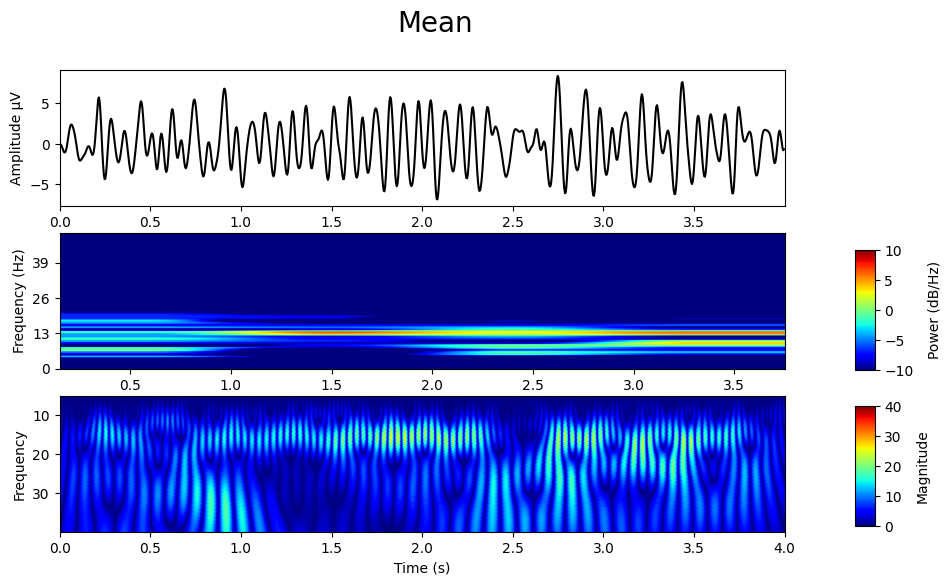

In [20]:

eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(23)
sampling_rate = 250

data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

samples_without_stimulus = int(0.5 * sampling_rate)

t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)


fs = sampling_rate  # Sampling frequency
window_length = 300  # Length of the window for computing the spectrogram
overlap = int(window_length / 4)  # Overlap between consecutive windows

data_names = ["OZ", "POZ", "OZ-POZ", "POZ-OZ"]

used_frequencies = [2, 7, 12, 17, 22, 27, 32, 37]

duration = len(eeg_data[0])/sampling_rate
x_ticks = np.arange(0, duration, step=0.5)

data = eeg_data[55, :, 0, 22]
filtered_data = signal.lfilter(b, a, data)

wavelet_name = 'morl'

frequencies = np.arange(5, 40, 0.2)  # Frequencies to analyze
cwtmatr, freqs = pywt.cwt(filtered_data, frequencies, wavelet_name)

fig, (ax1, ax2, ax4) = plt.subplots(nrows=3, figsize=(10, 6))
ax1.plot(t, filtered_data, 'k')
ax1.set_xlim(0, duration)
ax1.set_xticks(x_ticks)
ax1.set_ylabel("Amplitude " + '\u03BC' + "V")
ax1.set_xlabel("Time (s)")

vmin = -10
vmax = 10

Pxx, freqs, bins, im = ax2.specgram(filtered_data, NFFT=window_length, Fs=fs, noverlap=overlap, cmap='jet', vmin=vmin, vmax=vmax)
f_value = data_frequencies[22]
ticks = np.arange(0, 50, step=f_value)
ax2.set_yticks(ticks)
#ax2.set_xticks(x_ticks)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_ylim(0, 50)
cbar_ax2 = fig.add_axes([0.92, 0.38, 0.02, 0.2])  # [left, bottom, width, height]
cbar2 = plt.colorbar(im, cax=cbar_ax2)
cbar2.set_label('Power (dB/Hz)', labelpad=10)  # Adjust label position with labelpad

ax4.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(eeg_data[0])/sampling_rate, frequencies[-1], frequencies[0]], origin='upper', vmin = 0, vmax=40)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency')
cbar_ax4 = fig.add_axes([0.92, 0.12, 0.02, 0.2])
cbar4 = plt.colorbar(ax4.images[0], cax=cbar_ax4)
cbar4.set_label('Magnitude', labelpad=10)


plt.suptitle("Mean", fontsize=20)
plt.subplots_adjust(right=0.85)